In [785]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-



# Deep Neural Networks

## Assignment
### Neural Network with :

- **Ionosphere**
- **binary-class**

In [786]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from collections.abc import Callable
from typing import Literal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
%matplotlib inline

In [787]:
# gpus = tf.config.list_physical_devices('GPU')

# try:
#     for g in gpus:
#         tf.config.experimental.set_memory_growth(g, True)
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print (len(gpus), 'Phusical GPUs', len(logical_gpus), 'Logical GPUs')
# except:
#     print ('invalid device')

In [788]:
###----------------
### Some parameters
###----------------

inpDir = '../../input'
outDir = '../output'
subDir = 'ionosphere'
modelDir = '.../models'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 101 # number of epochs
ALPHA = 0.01 # learning rate
TEST_SIZE = 0.2
BATCH_SIZE = 32
TRAIN_SIZE = 256 # fix size of train set sot that we have batches of same size
PATIENCE = 10

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

## Generate Data Set
Ionosphere Dataset

In [789]:
data_df = pd.read_csv('ionosphere.data', header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [790]:
data_df.shape

(351, 35)

In [791]:
data_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

In [792]:
data_df = data_df.rename(columns={34: 'Classification'})
data_df.columns

Index([               0,                1,                2,                3,
                      4,                5,                6,                7,
                      8,                9,               10,               11,
                     12,               13,               14,               15,
                     16,               17,               18,               19,
                     20,               21,               22,               23,
                     24,               25,               26,               27,
                     28,               29,               30,               31,
                     32,               33, 'Classification'],
      dtype='object')

In [793]:
data_df.isna().sum()

0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                0
15                0
16                0
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                0
28                0
29                0
30                0
31                0
32                0
33                0
Classification    0
dtype: int64

In [794]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Classification
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [795]:
data_df['Classification'].unique()

array(['g', 'b'], dtype=object)

In [796]:
labels = { 'g' : 'Good', 'b': 'Bad'}

In [797]:
features_df = data_df.drop('Classification', axis = 1) # drop label col

label_df = data_df['Classification'] # labels

features_df.shape, label_df.shape

((351, 34), (351,))

In [798]:
label_df = pd.get_dummies(label_df)
label_df

,b,g
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
346,False,True
347,False,True
348,False,True
349,False,True


In [799]:
label_df.head()

,b,g
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True


In [800]:
#  Split the data in training and test sets to measure performance of the model.
X_train, X_test, y_train, y_test = train_test_split(features_df, label_df, 
                                                    stratify=label_df,
                                                    train_size=TRAIN_SIZE, 
                                                    random_state=RANDOM_STATE )

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(256, 34) (256, 2) (95, 34) (95, 2)


In [801]:
scaler = StandardScaler() # get the scaler

X_train = scaler.fit_transform(X_train) # train
X_test = scaler.transform(X_test) # test

y_train = y_train.to_numpy() # array
y_test = y_test.to_numpy() # convert to array

In [802]:
y_train

array([[ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ Tr

## Neural Network

Let's start with simple network. Our data has **two** features. Hence size of input layer will also be two. Lets code our output as two classes. The hidden layer could be of **any size**. One need to execute a handful of iterations to arrive at right size of hidden layer. For purpose of today's discussions, size of hidden layer is taken as shown below.
<img src='../../images/dnn_nb_s05_fig1.png' width = '500' alt = 'Session 5 Figure 1'/>

## Prepare Model:

In [803]:
knl_reg = tf.keras.regularizers.L2(l2 = 0.001)

dor1 = 0.1

# model = tf.keras.Sequential([
    
#     tf.keras.layers.Dense(18, #activation='swish',
#                           kernel_regularizer = knl_reg ),
    
#     tf.keras.layers.BatchNormalization(),
    
#     #Put Activation Layer here
#     tf.keras.layers.Activation('relu'),
    
#     tf.keras.layers.Dropout(rate=dor1, seed=RANDOM_STATE),
    
#     tf.keras.layers.Dense(9, #activation='relu',
#                           kernel_regularizer = knl_reg ),
    
#     tf.keras.layers.Dense(2)

# ])

input_layer = tf.keras.Input(shape=(34,))

x = tf.keras.layers.Dense(18, activation='relu',
                          kernel_regularizer = knl_reg ) (input_layer)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(dor1)(x)

x = tf.keras.layers.Dense(9, activation='relu',
                          kernel_regularizer = knl_reg ) (x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(dor1)(x)

output_layer = tf.keras.layers.Dense(2) (x)

model = tf.keras.Model(inputs= input_layer, outputs = output_layer)

model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 34)]              0         
                                                                 
 dense_52 (Dense)            (None, 18)                630       
                                                                 
 batch_normalization_34 (Bat  (None, 18)               72        
 chNormalization)                                                
                                                                 
 dropout_34 (Dropout)        (None, 18)                0         
                                                                 
 dense_53 (Dense)            (None, 9)                 171       
                                                                 
 batch_normalization_35 (Bat  (None, 9)                36        
 chNormalization)                                         

In [804]:
loss_function = tf.losses.CategoricalCrossentropy(from_logits=True)

In [805]:
X_train[:1].shape

(1, 34)

In [806]:
predict = model(X_train[:1])
predict

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.10699638,  0.39125815]], dtype=float32)>

In [807]:
predict.numpy().sum()

0.28426176

In [808]:
tf.nn.softmax(predict).numpy().sum()

1.0

In [809]:
model.compile?

Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs,
)
Docstring:
Configures the model for training.

Example:

```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
```

Args:
    optimizer: String (name of optimizer) or optimizer instance. See
      `tf.keras.optimizers`.
    loss: Loss function. May be a string (name of loss function), or
      a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
      function is any callable with the signature `loss = fn(y_true,
      y_pred)`, where `y_true` are the ground truth values, and
      `y_pred` are the model's predictions.
      `y_true` should have shape
      

In [810]:
model.compile(optimizer='rmsprop', 
              loss=loss_function,
              metrics=['accuracy'])

In [811]:
history = model.fit(X_train, y_train, 
                    validation_data=[X_test, y_test],
                    epochs=EPOCHS,
                    verbose=2,
                    batch_size=BATCH_SIZE
                    )

Epoch 1/101
8/8 - 2s - loss: 0.8729 - accuracy: 0.5352 - val_loss: 0.6339 - val_accuracy: 0.7263 - 2s/epoch - 199ms/step
Epoch 2/101
8/8 - 0s - loss: 0.7331 - accuracy: 0.5898 - val_loss: 0.5896 - val_accuracy: 0.7579 - 134ms/epoch - 17ms/step
Epoch 3/101
8/8 - 0s - loss: 0.6876 - accuracy: 0.6484 - val_loss: 0.5505 - val_accuracy: 0.7684 - 172ms/epoch - 21ms/step
Epoch 4/101
8/8 - 0s - loss: 0.5866 - accuracy: 0.7383 - val_loss: 0.5199 - val_accuracy: 0.7895 - 157ms/epoch - 20ms/step
Epoch 5/101
8/8 - 0s - loss: 0.5378 - accuracy: 0.7383 - val_loss: 0.4915 - val_accuracy: 0.8105 - 161ms/epoch - 20ms/step
Epoch 6/101
8/8 - 0s - loss: 0.5331 - accuracy: 0.7539 - val_loss: 0.4625 - val_accuracy: 0.8421 - 108ms/epoch - 14ms/step
Epoch 7/101
8/8 - 0s - loss: 0.4773 - accuracy: 0.7773 - val_loss: 0.4348 - val_accuracy: 0.8526 - 120ms/epoch - 15ms/step
Epoch 8/101
8/8 - 0s - loss: 0.4759 - accuracy: 0.8047 - val_loss: 0.4078 - val_accuracy: 0.8632 - 121ms/epoch - 15ms/step
Epoch 9/101
8/8 - 

In [812]:
loss_df = pd.DataFrame(history.history)

In [813]:
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.872887,0.535156,0.633917,0.726316
1,0.733099,0.589844,0.589639,0.757895
2,0.687624,0.648438,0.550533,0.768421
3,0.586597,0.738281,0.519932,0.789474
4,0.537792,0.738281,0.491547,0.810526


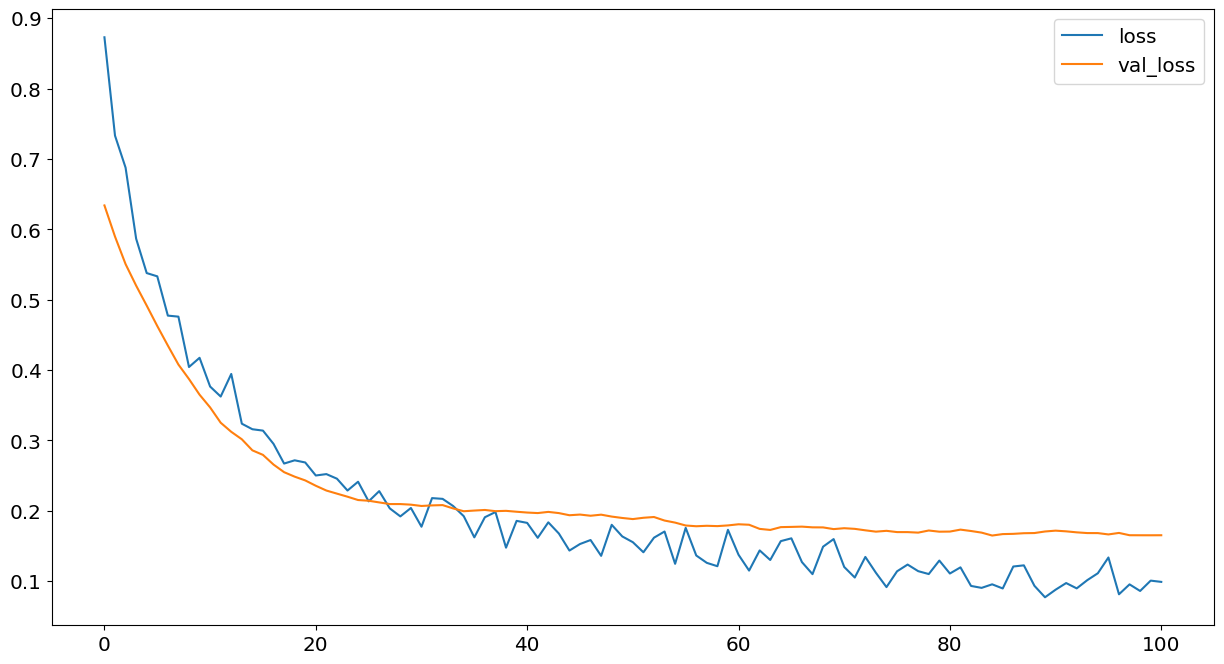

In [814]:
loss_df.plot(y = ['loss', 'val_loss']);

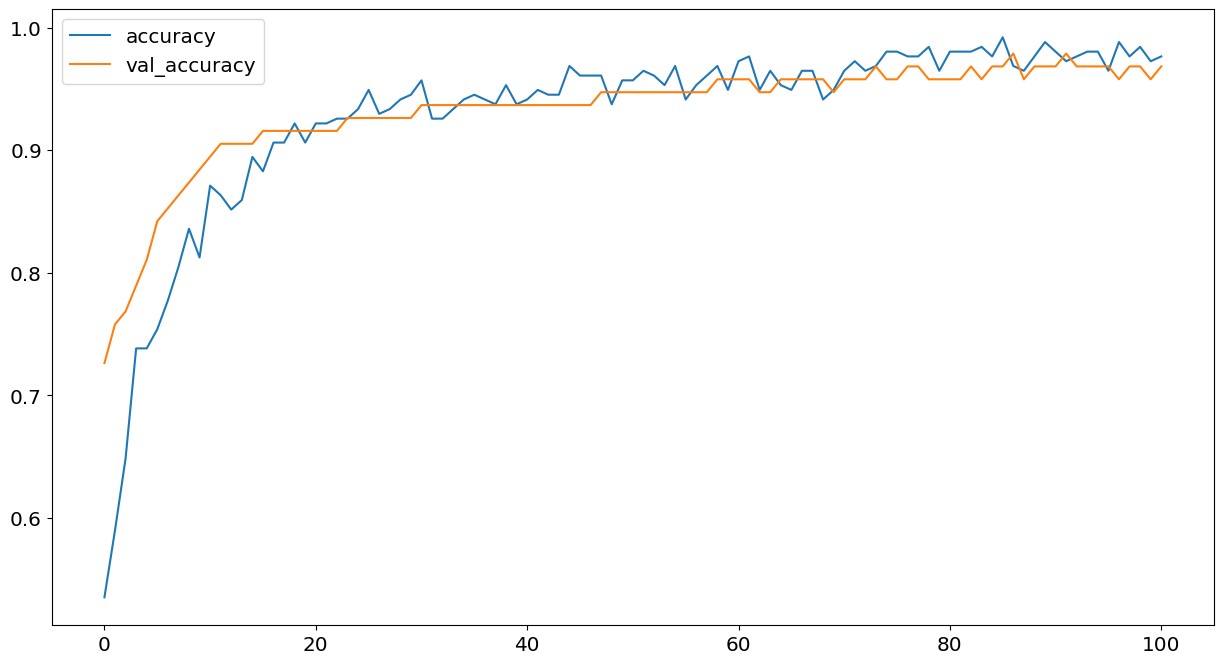

In [815]:
loss_df.plot(y = ['accuracy', 'val_accuracy']);

In [816]:
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 9ms/step - loss: 0.0563 - accuracy: 0.9961


[0.05626126006245613, 0.99609375]

In [817]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 16ms/step - loss: 0.1652 - accuracy: 0.9684


[0.16520895063877106, 0.9684210419654846]

In [818]:
y_pred = model.predict(X_train)

8/8 [==============================] - 0s 8ms/step


In [819]:
np.argmax(y_pred, axis = 1).shape

(256,)

In [820]:
y_train.shape

(256, 2)

In [821]:
accuracy_score (np.argmax(y_pred, axis = 1), np.argmax(y_train, axis = 1))

0.99609375

In [822]:
y_pred = model.predict(X_test)
accuracy_score (np.argmax(y_pred, axis = 1), np.argmax(y_test, axis = 1))

3/3 [==============================] - 0s 13ms/step


0.968421052631579

In [823]:
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 34)]              0         
                                                                 
 dense_52 (Dense)            (None, 18)                630       
                                                                 
 batch_normalization_34 (Bat  (None, 18)               72        
 chNormalization)                                                
                                                                 
 dropout_34 (Dropout)        (None, 18)                0         
                                                                 
 dense_53 (Dense)            (None, 9)                 171       
                                                                 
 batch_normalization_35 (Bat  (None, 9)                36        
 chNormalization)                                         

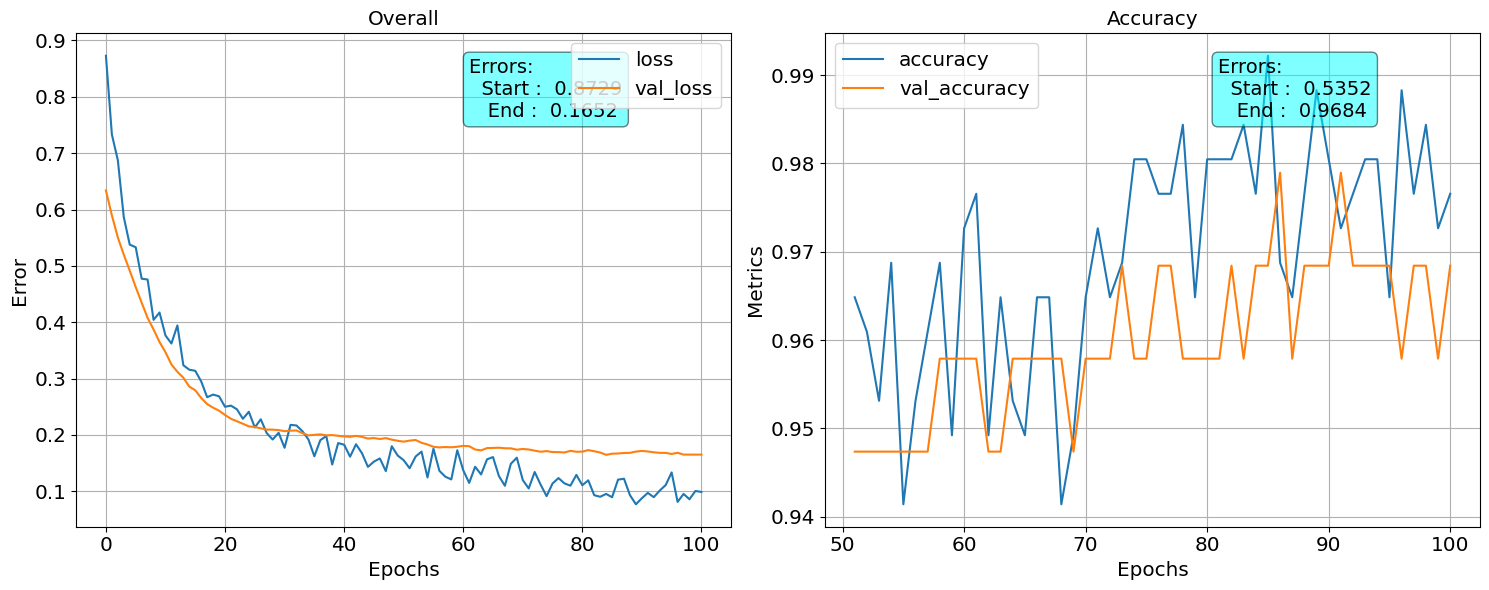

In [824]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

l_range = 50

ax = axes[0]
y1 = loss_df.columns[0]
y2 = loss_df.columns[2]

loss_df.plot( y = [y1, y2], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0][y1],
                                                                loss_df.iloc[-1][y2]) #text to plot

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Overall')
ax.grid();

ax = axes[1]
y1 = loss_df.columns[1]
y2 = loss_df.columns[3]
loss_df[-l_range:].plot( y = [y1, y2], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0][y1],
                                                                loss_df.iloc[-1][y2]) #text to plot

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Metrics")
ax.set_title(y1.capitalize())
ax.grid();
plt.tight_layout()

In [825]:
loss_df[loss_df['val_loss'] == loss_df['val_loss'].min()]

,loss,accuracy,val_loss,val_accuracy
84,0.095455,0.976562,0.164787,0.968421


In [826]:
es_check_point = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=PATIENCE,
    verbose=1,
    restore_best_weights=True,
    start_from_epoch=0,
)


In [827]:
history = model.fit(X_train, y_train, 
                    validation_data=[X_test, y_test],
                    epochs=EPOCHS,
                    verbose=2,
                    batch_size=BATCH_SIZE,
                    callbacks=[ es_check_point ]
                    )

Epoch 1/101
8/8 - 0s - loss: 0.1044 - accuracy: 0.9688 - val_loss: 0.1695 - val_accuracy: 0.9684 - 269ms/epoch - 34ms/step
Epoch 2/101
8/8 - 0s - loss: 0.1015 - accuracy: 0.9727 - val_loss: 0.1708 - val_accuracy: 0.9684 - 142ms/epoch - 18ms/step
Epoch 3/101
8/8 - 0s - loss: 0.0631 - accuracy: 0.9883 - val_loss: 0.1723 - val_accuracy: 0.9684 - 135ms/epoch - 17ms/step
Epoch 4/101
8/8 - 0s - loss: 0.0845 - accuracy: 0.9688 - val_loss: 0.1686 - val_accuracy: 0.9684 - 169ms/epoch - 21ms/step
Epoch 5/101
8/8 - 0s - loss: 0.0831 - accuracy: 0.9727 - val_loss: 0.1726 - val_accuracy: 0.9684 - 122ms/epoch - 15ms/step
Epoch 6/101
8/8 - 0s - loss: 0.0822 - accuracy: 0.9805 - val_loss: 0.1713 - val_accuracy: 0.9579 - 141ms/epoch - 18ms/step
Epoch 7/101
8/8 - 0s - loss: 0.1372 - accuracy: 0.9609 - val_loss: 0.1733 - val_accuracy: 0.9684 - 190ms/epoch - 24ms/step
Epoch 8/101
8/8 - 0s - loss: 0.1025 - accuracy: 0.9688 - val_loss: 0.1728 - val_accuracy: 0.9684 - 144ms/epoch - 18ms/step
Epoch 9/101
8/8 

In [828]:
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9961


[0.05164308100938797, 0.99609375]

In [829]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 9ms/step - loss: 0.1658 - accuracy: 0.9684


[0.16583438217639923, 0.9684210419654846]